In [ ]:
pip install pandas scikit-learn

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from IPython.display import display
from sklearn.metrics import accuracy_score, classification_report

# **Input Data ke Google Colab**

In [ ]:
# Load dataset dari file
df = pd.read_csv("/content/drive/MyDrive/Final_project/data_cleaned.csv")

display(df.head())

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition...,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol ...","₹ 6,85,000"


# **Mengubah kolom 'kmDriven' menjadi numerik**

In [ ]:
# Preprocessing 'kmDriven'
df['kmDriven'] = pd.to_numeric(
    df['kmDriven']
    .str.replace(',', '')
    .str.replace(' km', ''),
    errors='coerce'
).fillna(0).astype(int)

# Cek hasil setelah preprocessing
print(df['kmDriven'].head())

0     98000
1    190000
2     77246
3     83500
4     45000
Name: kmDriven, dtype: int64


# **Kolom Brand, Model, Transmission, dan Owner diubah menjadi angka**

In [ ]:
# Encode kolom kategorikal menggunakan LabelEncoder
label_enc = LabelEncoder()
for col in ['Brand', 'model', 'Transmission', 'Owner']:
    df[col] = label_enc.fit_transform(df[col])

# **Encode kolom target**

In [ ]:
# Encode target FuelType
df['FuelType'] = label_enc.fit_transform(df['FuelType'])

# **Pisahkan fitur (X) dan target (y)**

In [ ]:
# Fitur (X) dan target (y)
X = df.drop(columns=['FuelType', 'AskPrice', 'PostedDate', 'AdditionInfo'])  # Hapus kolom tidak relevan
y = df['FuelType']

# **Train-Test Split**
Pisahkan data menjadi 80% data latih dan 20% data uji

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Normalisasi Data**

In [ ]:
# Normalisasi menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Training Model Logistic Regression**

In [ ]:
# Inisialisasi dan training model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

# **Evaluasi Model**

In [ ]:
# Prediksi pada data test
y_pred = logreg.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5294731351069379
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59       790
           1       0.00      0.00      0.00       403
           2       0.50      0.73      0.59       724

    accuracy                           0.53      1917
   macro avg       0.35      0.45      0.39      1917
weighted avg       0.42      0.53      0.47      1917



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Masalah**

Accuracy: 0.53 (sekitar 53%)
Ini menunjukkan bahwa model yang saya gunakan ini hanya dapat memprediksi dengan benar sekitar 53% dari total data uji. Nilai ini rendah untuk klasifikasi.

# **Solusi**

Mencoba untuk menggunakan model lain yaitu menggunakan Model Random Forest



In [ ]:
# Import library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Melatih model dengan data train
rf_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)

# Evaluasi performa model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

# Classification Report
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Accuracy (Random Forest): 0.7464788732394366
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       790
           1       0.68      0.57      0.62       403
           2       0.69      0.74      0.72       724

    accuracy                           0.75      1917
   macro avg       0.73      0.72      0.72      1917
weighted avg       0.75      0.75      0.74      1917



# **Hasil**


Accuracy: 0.75 (74.6%)
 model berhasil memprediksi sekitar 75% dari data uji dengan benar. Peningkatan ini menunjukkan bahwa Random Forest mampu menangkap pola lebih baik, terutama untuk menangani kelas yang tidak seimbang.

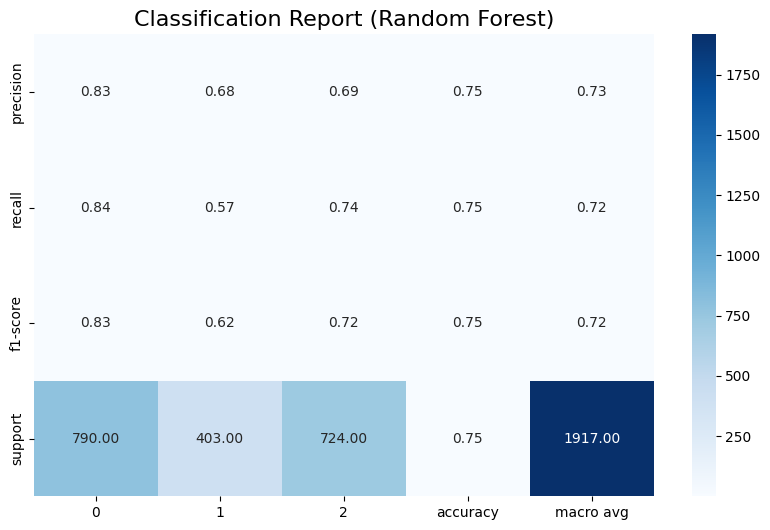

In [ ]:
# Menghasilkan classification report
report = classification_report(y_test, y_pred_rf, output_dict=True)

# Mengonversi classification report menjadi DataFrame
report_df = pd.DataFrame(report).transpose()

# Visualisasi tabel dengan seaborn heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="Blues", fmt='.2f', cbar=True)
plt.title("Classification Report (Random Forest)", fontsize=16)
plt.show()